# Here you can find the code and the results of the Google Trends search 

The following notebook is divided into the following sections:
* Global Canadian Trends
* Defining the keywords and their interest over time
* Related queries
* Trending Topics
* Results by province







<p> The code to perform this analysis is Python, which is a high-level programming language with dynamic semantics. The first step is to install the code libraries that we will be using through Python:</p>

 **Pytrends**: Is a Google Trends API (An application Program Interface (API) is code that allows two software programs to communicate with each other in this case Google Trends and Python ), that provides different methods to download reports of trending results from google trends.

**Pandas**: Is a software library written for the Python programming language for data manipulation and analysis.

**Openpyxl** : Is a software library that allows to safe the mains results in a excel file. 

**Plotly**: To make amazing charts

**Wordcloud** : For visualizations

In [ ]:
!pip install pytrends
import pandas as pd
!pip install openpyxl
import plotly.express as px
!pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Global Canadian Trends

The result shows the today's trending search in Canada

In [ ]:
from pytrends.request import TrendReq
pytrends = TrendReq()
df1 = pytrends.trending_searches(pn='canada')
print(df1.head(15))

                        0
0                     CPI
1   Mississauga-Lakeshore
2        Arsenal vs Milan
3                The 1975
4                 Binance
5       The Cleaning Lady
6           Barry Sherman
7   Indian Chinese troops
8    Argentina vs Croatia
9      Golden Globes 2023
10               Jim Carr
11          Chris Bassitt
12      Sam Bankman-Fried
13    Flames vs Canadiens
14           Kyler Murray


In [ ]:
#Safe the results in a Excel file
df1.to_excel('todayscanadiantrends.xls')
print('DataFrame "Excel 1"  is exported successfully to an Excel File."')


## Defining the keywords and their interest over time

The following words were selected: 'Mental Health','Health', 'Depression','Anxiety','Psychologist', 'Psychologist','Psychiatrist', 'Exam', 'Tutoring','School help','Return to school','Christmas,'Thanksgiving','Easter','Summer break', to find the most searched queries and trends related to the business. 


Pytrends allows you to select the topic where trends should be searched, in this sector the category is 437, which corresponds to mental health, the chosen period was 5 years.

### Related Queries

In [ ]:
# build payload

kw_list1 = ["mental health","health", "depression","anxiety","psychologist"] # list of keywords to get data, beacause the payload is limited to 5 words per search, I divided the keyword list into 3. 

pytrends.build_payload(kw_list=kw_list1,timeframe='today 5-y',geo='CA', cat= 437)
df2= pytrends.related_queries()
df2


In [ ]:
kw_list2 = ["exam", "tutoring","school help","return to school","christmas"] # list of keywords to get data 

pytrends.build_payload(kw_list=kw_list2,timeframe='today 5-y',geo='CA', cat= 437)
df3= pytrends.related_queries()
df3

In [ ]:
kw_list3 = ["thanksgiving","easter","summer break"] # list of keywords to get data 

pytrends.build_payload(kw_list=kw_list2,timeframe='today 5-y',geo='CA', cat= 437)
df4= pytrends.related_queries()
df4

###Using Pytrends to find suggestions

Suggestions: returns a list of additional suggested keywords that can be used to refine a trend search.

In [ ]:
pytrends.suggestions("mental health")

In [ ]:
pytrends.suggestions("anxiety")

In [ ]:
pytrends.suggestions("tutoring")

Considering the results that pytrends gives us for queries and suggestions, for the last 5 years of searching in Canada, we obtain the keyword_list database (keyword_list.cvs) with a total of 148 keywords.

The next step is to find the most used to perform the analysis over time and find the correlations between the health words and the words related to 'vacation'

In [ ]:
#reading the excel file
dfkw= pd.read_csv("keyword_list.csv")
dfkw.head(20) #Displaying the first 20 narrows

In [ ]:
#Summarizing statistics
dfkw.describe()

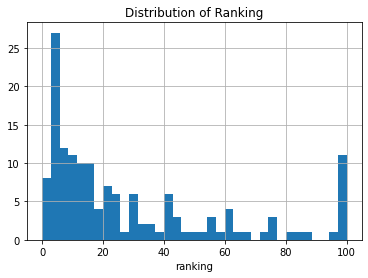

In [ ]:
#Display a histogram to understand their distribution
import matplotlib.pyplot as plt
import seaborn as sns
dfkw.hist('ranking', bins=35);
plt.title('Distribution of Ranking');
plt.xlabel('ranking');

In [ ]:
#Interquartile Range to find a range to allows to select the most used words. 
#Define SD of charges
#Quartile 1 and 3
Q1 = dfkw.ranking.quantile(0.25)
Q3 = dfkw.ranking.quantile(0.75)

IQR = Q3 -Q1

#Limits
lower_limit = Q1 -1.5*IQR
upper_limit = Q3 +1.5*IQR
lower_limit, upper_limit



The histogram shows us that the rankings are very dispersed and biased to the right, that is, data with low ranking, its implementation in the SEOS of the web page could generate low results.

The result of the interquartile range for this reason shows a range in which practically all the words are found, for this reason a ranking of median +2std it will be taken to limit the list of words, this will allow us to have the most used ones and continue with the analysis of time and find correlations.


In [ ]:
median= dfkw.median()

limit = median + 29.2
limit


limit2 = limit + 29.2
limit2


In [ ]:
dfcopy1 = dfkw.copy()
dfcopy1.drop(dfcopy1.loc[dfcopy1['ranking'] < 74].index, inplace=True)

dfcopy1.describe()

#The final list with the most popular searchings: 

In [ ]:
dfcopy1.head(18)

,Keywords,ranking
1,depression,85
2,anxiety,100
7,help,100
9,christmas,100
10,mental health illness,100
11,mental health canada,96
12,ontario mental health,77
34,mental,100
35,mental health,100
59,anxiety depression,100


Now we have a new list with 18 key words, lets save it into excel 

In [ ]:
dfcopy1['Keywords'].to_csv('finalkeywords.csv')
print('DataFrame "finalkeywords.csv"  is exported successfully to an Excel File."')

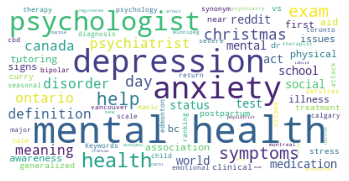

In [ ]:
#wordcloud with 146 keywords , to make some visualizations
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt


text = open('keyword_list.csv', 'r').read()



wc = WordCloud(stopwords=STOPWORDS,
               
               background_color= "white",
               contour_color= "black",
               contour_width= 3,
               min_font_size =5,
               max_words = 250
               ).generate(text)

plt.imshow(wc)
plt.axis('off')
plt.show()



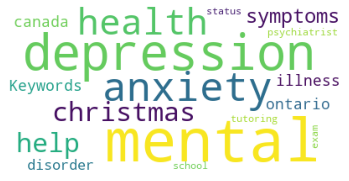

In [ ]:
#wordcloud with 16 keywords to make some visutalizations
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import matplotlib.pyplot as plt
import PIL.Image

text = open('finalkeywords.cvs', 'r').read()


wc = WordCloud(stopwords=STOPWORDS,
               
               background_color= "white",
               contour_color= "black",
               contour_width= 3,
               min_font_size =3,
               max_words = 35
               ).generate(text)

plt.imshow(wc)
plt.axis('off')
plt.show()

# Interest over time


Now that we have the final keywords, let's find their ranking over time.

In [ ]:
#Interest over time all the country
import time
startTime = time.time()
pytrend = TrendReq(hl='en-CA', tz=360)

colnames = ["keywords"]
df2 = pd.read_csv("finalkeywords.cvs", names=colnames)
df2 = df2["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=437,
     timeframe='2015-01-01 2022-11-15',
     geo='CA')
     data = pytrend.interest_over_time()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

result = pd.concat(dataset, axis=1)
result.to_csv('search_trendscanada.csv')

executionTime = (time.time() - startTime)
print('The file "search_trendscanada.cvs" was created, execution time in sec.: ' + str(executionTime))



In [ ]:
#Interest over time by province
import time
startTime = time.time()
pytrend = TrendReq(hl='en-CA', tz=360)

colnames = ["keywords"]
df2 = pd.read_csv("finalkeywords.csv", names=colnames)
df2 = df2["keywords"].values.tolist()
df2.remove("Keywords")

dataset = []

for x in range(0,len(df2)):
     keywords = [df2[x]]
     pytrend.build_payload(
     kw_list=keywords,
     cat=437,
     timeframe='2015-01-01 2022-11-15',
     geo='CA')
     data = pytrends.interest_by_region()
     if not data.empty:
          data = data.drop(labels=['isPartial'],axis='columns')
          dataset.append(data)

result = pd.concat(dataset, axis=1)
result.to_csv('search_trendsprovince.csv')

executionTime = (time.time() - startTime)
print('The file "search_trendsprovince.cvs" was created, execution time in sec.: '+ str(executionTime))




In [ ]:
dataprov = pd.read_csv('search_trendsprovince.csv')
dataprov.head(15)

# Correlations



Let's find some correlation with the trends over time of the final words 

In [ ]:
#Canada

datacrr = pd.read_csv('search_trendscanada.csv')
datacrr.head()


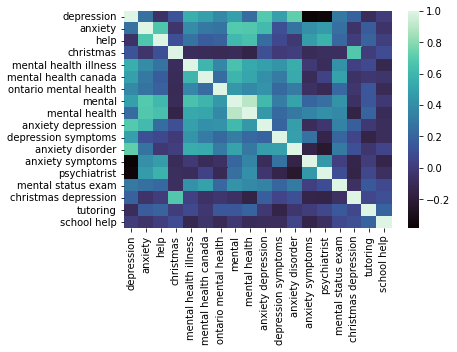

In [ ]:
corr = datacrr.corr()
plot = sns.heatmap(corr, cmap='mako')
plt.show(plot)

We now have data on 148 business-related keywords, we found the top 18 keywords, and we also have the interest over time and the correlation of them. The next step is to develop an executive pitch.

All information is automated here to download as cvs files. 

In [ ]:
!pip install nbconvert
!jupyter nbconvert --to html /content/Capstoneproject.ipynb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[NbConvertApp] Converting notebook /content/Capstoneproject.ipynb to html
[NbConvertApp] Writing 532066 bytes to /content/Capstoneproject.html
